In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from tensorflow import keras

----
## Linear regression and gradients

In [2]:
w_true = 0.1
b_true = 0.5

In [3]:
def make_data(w=w_true, b=b_true, n =100):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(len(x,),), mean=0.0, stddev=0.01)
    y = w*x + b + noise
    return x.numpy(), y.numpy()

In [4]:
x, y = make_data()

In [5]:
def predict(x, w, b):
    y = w*x + b
    return y

Original data:

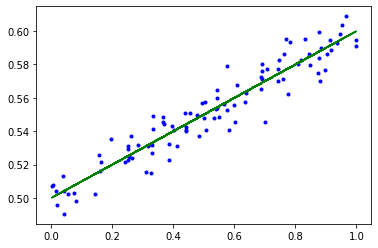

In [6]:
%matplotlib inline
plt.plot(x, y, 'b.')
plt.plot(x, predict(x, w_true, b_true), 'g')

Loss function:

In [7]:
def mse(y_hat, y):
    return tf.reduce_mean(tf.square(y_hat - y))

Iterations using __gradient__:

In [8]:
w_guess = tf.Variable(0.0)
b_guess = tf.Variable(0.0)

learning_rate = 0.05
steps = 200

for step in range(steps):
    with tf.GradientTape() as tape:
        y_hat = predict(x, w_guess, b_guess)
        loss = mse(y_hat, y)
        
        grads = tape.gradient(loss, [w_guess, b_guess])
        w_guess.assign_sub(grads[0]*learning_rate)
        b_guess.assign_sub(grads[1]*learning_rate)
        
        if step % 20 == 0:
            print("Step {} loss {}".format(step, loss))            
        

Step 0 loss 0.3051566481590271
Step 20 loss 0.0024343659169971943
Step 40 loss 0.0009568794048391283
Step 60 loss 0.0007659824332222342
Step 80 loss 0.0006197073380462825
Step 100 loss 0.0005045825382694602
Step 120 loss 0.00041396135929971933
Step 140 loss 0.0003426291514188051
Step 160 loss 0.0002864794514607638
Step 180 loss 0.000242281035752967


Results:

In [9]:
print(w_guess.numpy())
print(b_guess.numpy())

0.14015837
0.47792807


Resulting plot:

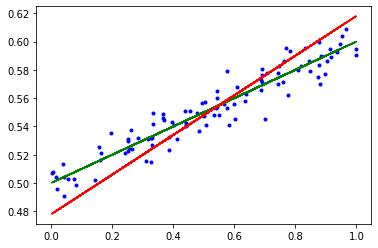

In [10]:
%matplotlib inline
plt.plot(x, y, 'b.')
plt.plot(x, predict(x, w_true, b_true), 'g')
plt.plot(x, predict(x, w_guess, b_guess), 'r')

----
## NNs and MNIST dataset

Loading data from keras

In [82]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

In [83]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


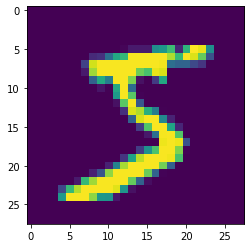

In [84]:
%matplotlib inline
plt.imshow(x_train[0])

In [85]:
print(y_train[0])

5


Building a __simple model__

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [78]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=64, activation='relu')) # 'sigmoid'
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [79]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer=tf.optimizers.Adam(), #'adam', 
              loss= tf.losses.SparseCategoricalCrossentropy(), #'sparse_categorical_crossentropy' 
              metrics=['accuracy']) # 'SGD' stohastic gradient

In [74]:
%%time
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3344 - accuracy: 0.9024 - val_loss: 0.1760 - val_accuracy: 0.9474
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1374 - accuracy: 0.9592 - val_loss: 0.1413 - val_accuracy: 0.9580
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1035 - accuracy: 0.9693 - val_loss: 0.1105 - val_accuracy: 0.9677
Epoch 4/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0819 - accuracy: 0.9755 - val_loss: 0.1059 - val_accuracy: 0.9692
Epoch 5/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0694 - accuracy: 0.9789 - val_loss: 0.1115 - val_accuracy: 0.9689
Wall time: 13.7 s


In [75]:
h = model.history.history

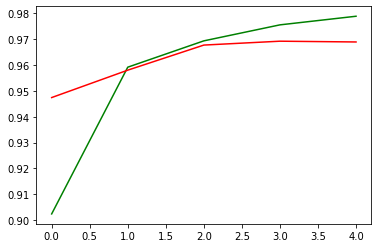

In [76]:
plt.plot(h['accuracy'], 'g')
plt.plot(h['val_accuracy'], 'r')

In [77]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.1115 - accuracy: 0.9689


[0.11153342748600989, 0.9689]

__All together__

Train on 51000 samples, validate on 9000 samples
Epoch 1/5
51000/51000 [==============================] - 4s 88us/sample - loss: 0.2190 - accuracy: 0.9346 - val_loss: 0.1122 - val_accuracy: 0.9662
Epoch 2/5
51000/51000 [==============================] - 5s 90us/sample - loss: 0.0909 - accuracy: 0.9728 - val_loss: 0.0974 - val_accuracy: 0.9709
Epoch 3/5
51000/51000 [==============================] - 4s 82us/sample - loss: 0.0611 - accuracy: 0.9806 - val_loss: 0.0748 - val_accuracy: 0.9789
Epoch 4/5
51000/51000 [==============================] - 5s 88us/sample - loss: 0.0418 - accuracy: 0.9869 - val_loss: 0.0808 - val_accuracy: 0.9784
Epoch 5/5
51000/51000 [==============================] - 4s 85us/sample - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.0713 - val_accuracy: 0.9792


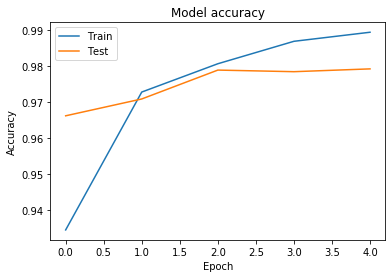

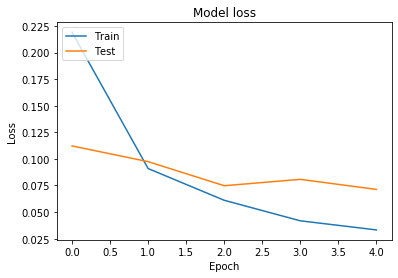

In [87]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.15,
                    epochs=5,
                    batch_size=16,
                    verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [88]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.0786 - accuracy: 0.9777


[0.07855307183193508, 0.9777]

In [97]:
res = model.predict(x_test[0].reshape((1, 28, 28)))

In [91]:
y_test[0]

7

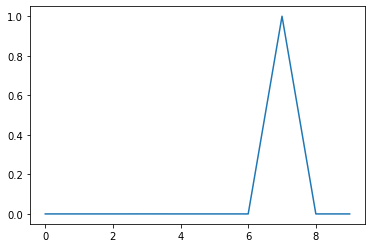

In [94]:
plt.plot(range(10), res[0])

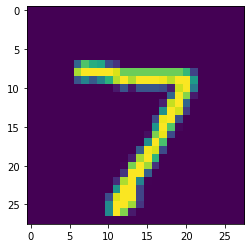

In [95]:
plt.imshow(x_test[0])